In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
def plot_pca_with_elbow_and_clustering(df, max_k=10):
    pca = PCA()
    pca_data = pca.fit_transform(df)
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

    labels = [f'PC{i+1}' for i in range(len(per_var))]
    plt.figure(figsize=(8, 4))
    plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Components')
    plt.title('Scree Plot')
    plt.tight_layout()
    plt.show()

    pca_df = pd.DataFrame(pca_data, index=df.index, columns=labels)

    sse = []
    X = pca_df[["PC1", "PC2"]]
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, max_k+1), sse, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE (Inertia)")
    plt.tight_layout()
    plt.show()

    diffs = np.diff(sse)
    second_diffs = np.diff(diffs)
    elbow_k = np.argmin(second_diffs) + 2
    print(f"Suggested number of clusters (elbow): {elbow_k}")

    final_kmeans = KMeans(n_clusters=elbow_k, n_init=10)
    pca_df["Cluster"] = final_kmeans.fit_predict(X)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2")
    plt.title(f"PCA Clustering (k={elbow_k})")
    plt.xlabel(f'PC1 ({per_var[0]}%)')
    plt.ylabel(f'PC2 ({per_var[1]}%)')
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    for i in range(len(pca.components_)):
        loading_scores = pd.Series(pca.components_[i], index=df.columns)
        sorted_loading = loading_scores.abs().sort_values(ascending=False)
        print(f"\nTop contributors to PC{i+1}:")
        print(sorted_loading)

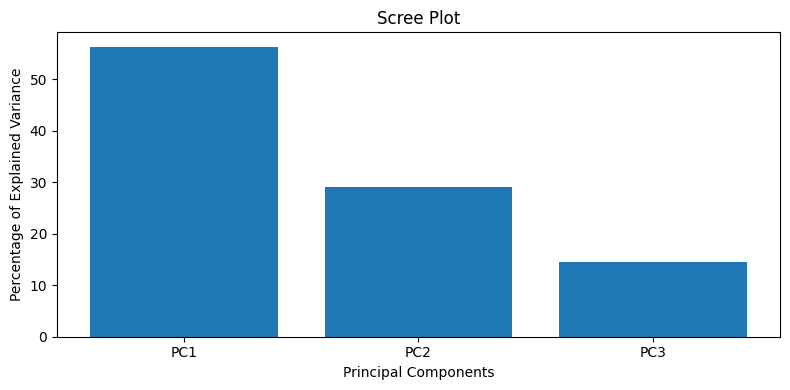

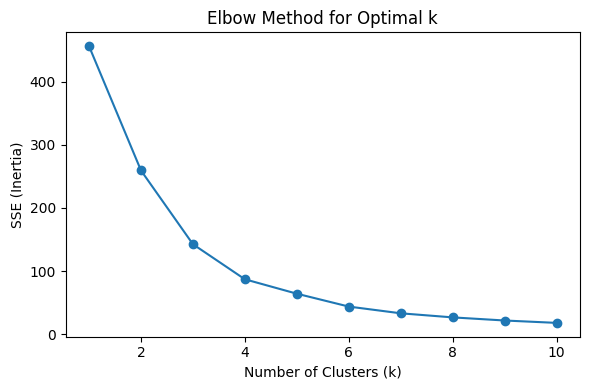

Suggested number of clusters (elbow): 9


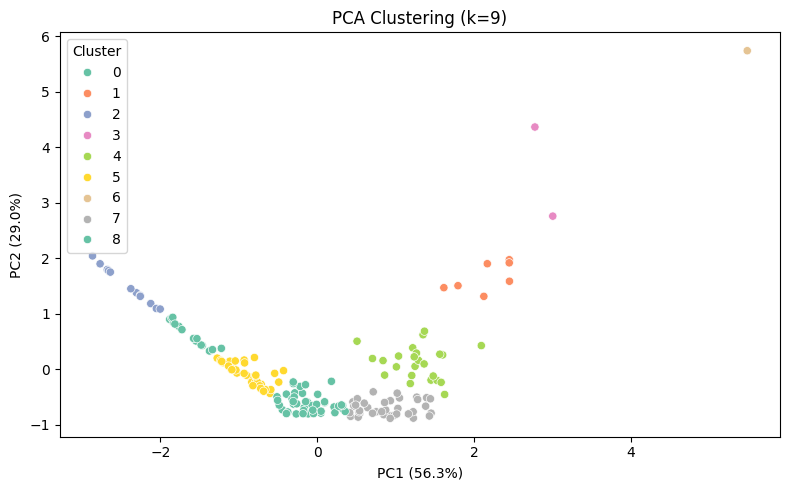


Top contributors to PC1:
Mobile_Subscriptions             0.669212
Internet_Users                   0.556925
Fixed_Broadband_Subscriptions    0.491925
dtype: float64

Top contributors to PC2:
Fixed_Broadband_Subscriptions    0.773199
Internet_Users                   0.632788
Mobile_Subscriptions             0.041751
dtype: float64

Top contributors to PC3:
Mobile_Subscriptions             0.741898
Internet_Users                   0.537972
Fixed_Broadband_Subscriptions    0.400217
dtype: float64


In [7]:
df = pd.read_csv("sub_indices/access_connectivity_standardised.csv")
df = df.drop(columns=["Country"])

plot_pca_with_elbow_and_clustering(df)

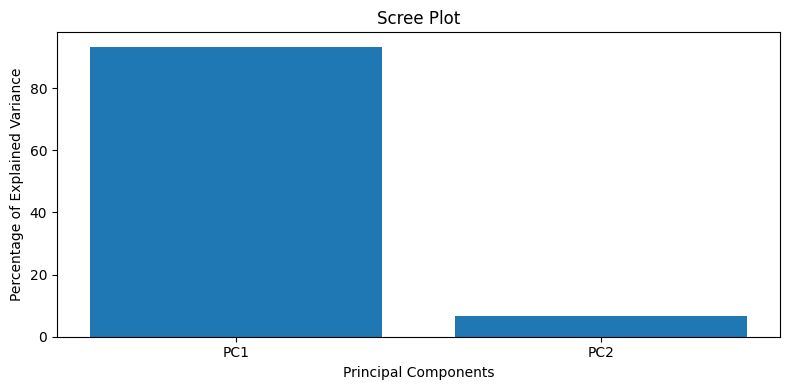

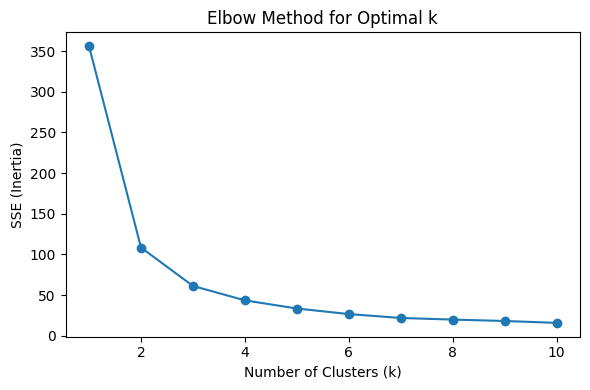

Suggested number of clusters (elbow): 9


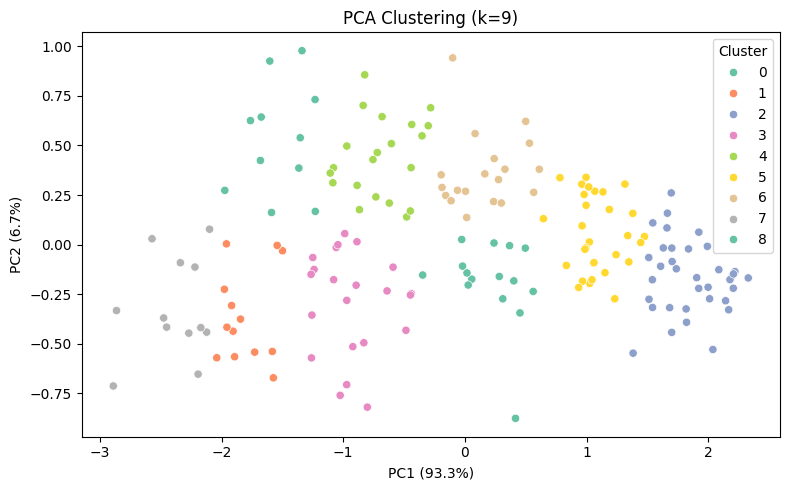


Top contributors to PC1:
E-Participation_Index    0.707107
E-Government_Index       0.707107
dtype: float64

Top contributors to PC2:
E-Government_Index       0.707107
E-Participation_Index    0.707107
dtype: float64


In [8]:
df = pd.read_csv("sub_indices/digital_governance_participation_standardised.csv")
df = df.drop(columns=["Country"])

plot_pca_with_elbow_and_clustering(df)

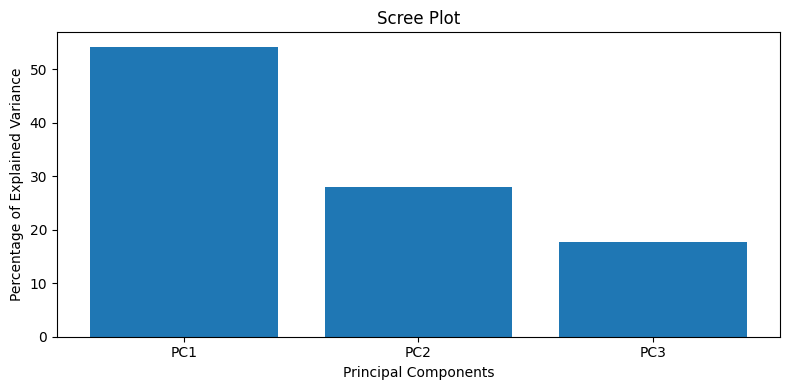

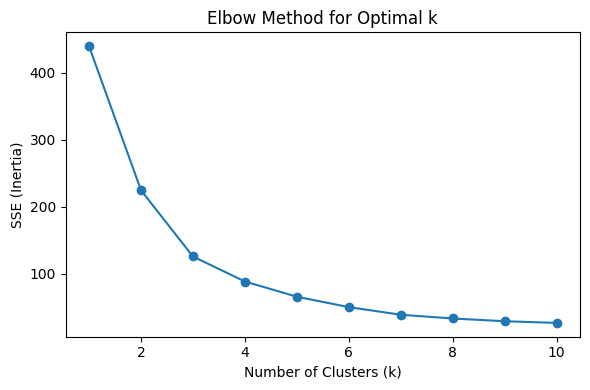

Suggested number of clusters (elbow): 8


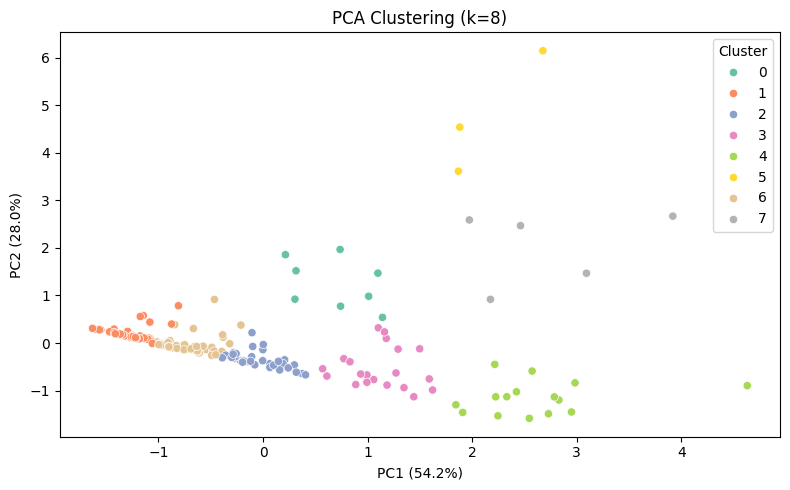


Top contributors to PC1:
ICT_Goods_Imports      0.635246
ICT_Service_Exports    0.626974
High-Tech_Exports      0.450962
dtype: float64

Top contributors to PC2:
High-Tech_Exports      0.891675
ICT_Service_Exports    0.347859
ICT_Goods_Imports      0.289672
dtype: float64

Top contributors to PC3:
ICT_Goods_Imports      0.715928
ICT_Service_Exports    0.697064
High-Tech_Exports      0.039359
dtype: float64


In [9]:
df = pd.read_csv("sub_indices/digital_trade_economy_standardised.csv")
df = df.drop(columns=["Country"])

plot_pca_with_elbow_and_clustering(df)

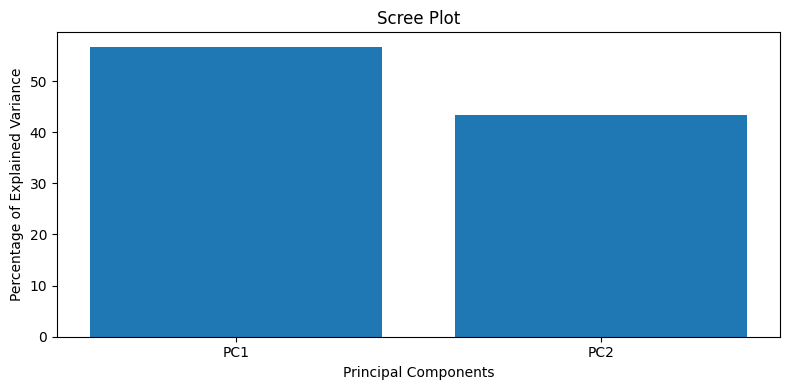

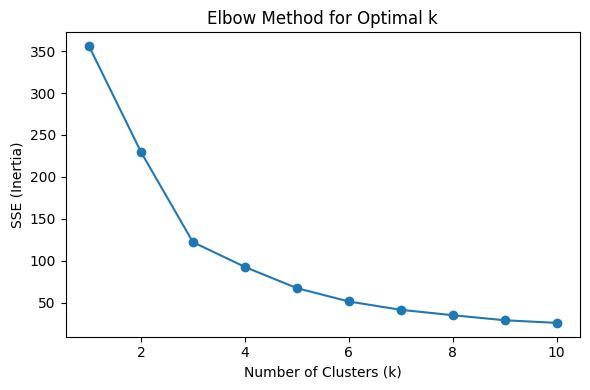

Suggested number of clusters (elbow): 8


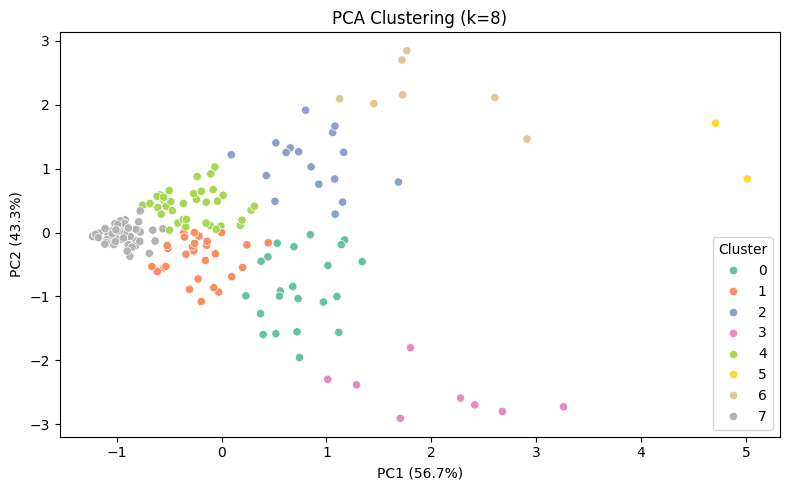


Top contributors to PC1:
Adult_Literacy_Rate              0.707107
Tertiary_Education_Enrollment    0.707107
dtype: float64

Top contributors to PC2:
Adult_Literacy_Rate              0.707107
Tertiary_Education_Enrollment    0.707107
dtype: float64


In [10]:
df = pd.read_csv("sub_indices/education_human_capital_standardised.csv")
df = df.drop(columns=["Country"])

plot_pca_with_elbow_and_clustering(df)

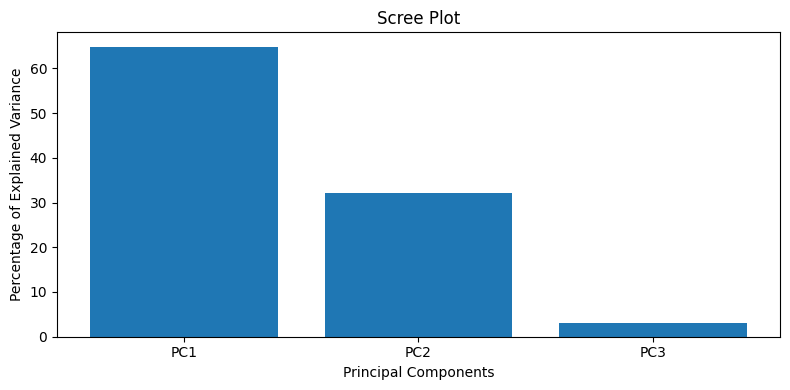

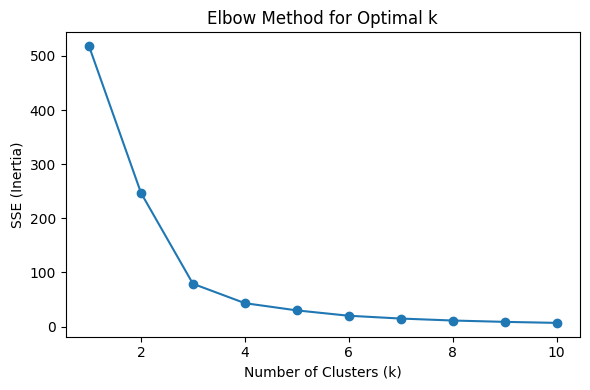

Suggested number of clusters (elbow): 9


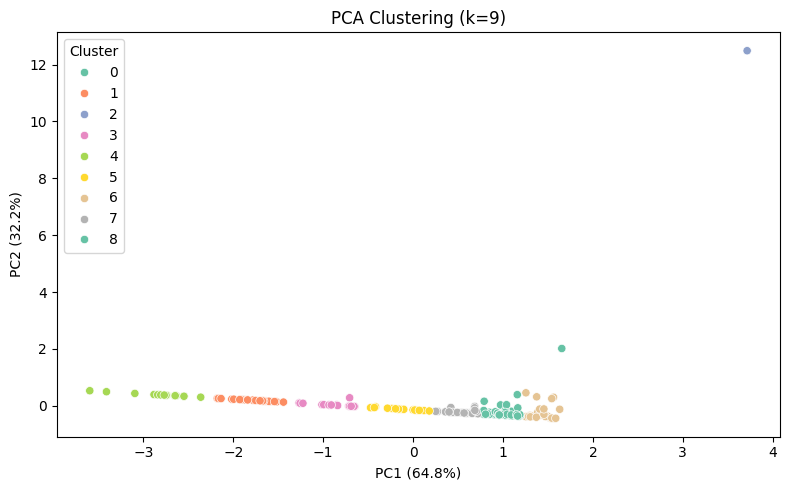


Top contributors to PC1:
Telecommunication_Infrastructure_Index    0.695342
Secure_Internet_Servers_alt               0.694485
Secure_Internet_Servers_per_million       0.184907
dtype: float64

Top contributors to PC2:
Secure_Internet_Servers_per_million       0.982732
Secure_Internet_Servers_alt               0.135564
Telecommunication_Infrastructure_Index    0.125934
dtype: float64

Top contributors to PC3:
Telecommunication_Infrastructure_Index    0.707559
Secure_Internet_Servers_alt               0.706621
Secure_Internet_Servers_per_million       0.006805
dtype: float64


In [11]:
df = pd.read_csv("sub_indices/infrastructure_security_standardised.csv")
df = df.drop(columns=["Country"])

plot_pca_with_elbow_and_clustering(df)

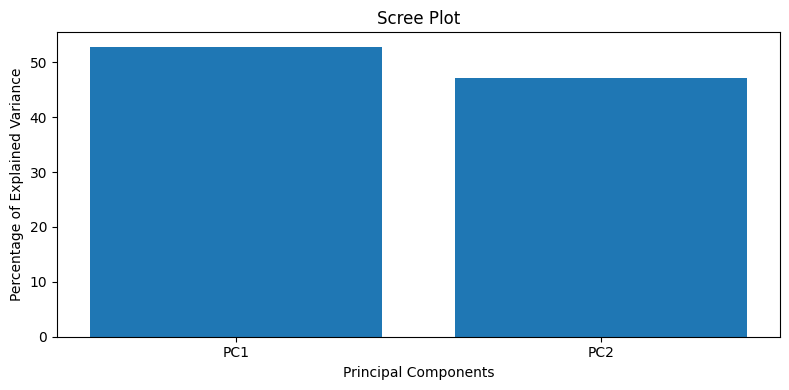

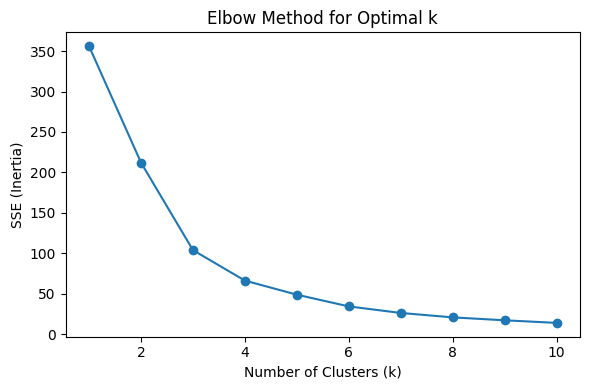

Suggested number of clusters (elbow): 9


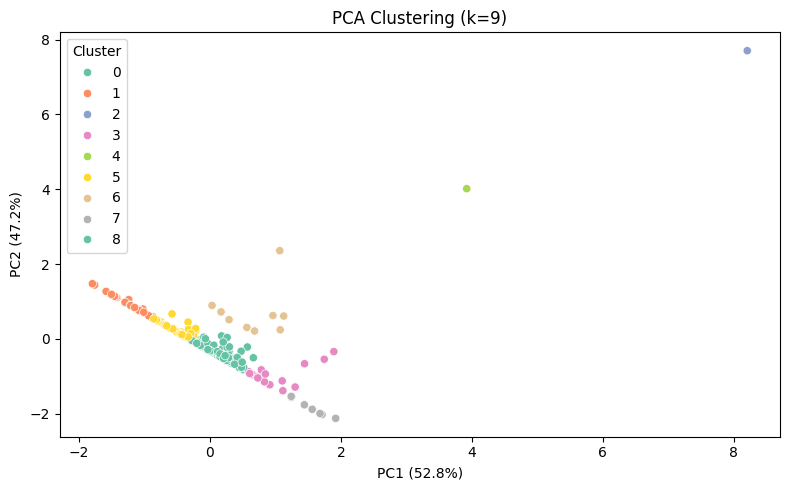


Top contributors to PC1:
Patent_Applications    0.707107
R&D_Expenditure        0.707107
dtype: float64

Top contributors to PC2:
R&D_Expenditure        0.707107
Patent_Applications    0.707107
dtype: float64


In [12]:
df = pd.read_csv("sub_indices/innovation_rd_standardised.csv")
df = df.drop(columns=["Country"])

plot_pca_with_elbow_and_clustering(df)

Now that I have done multivariate analysis, i can confidently drop certain indicators that have little to know effect or contributions

- Access & Connectivity
    - Fixed Broadband Subscriptions
- Digital Trade Economy
    - High-Tech Exports
- Infrastructure Security
    - Secure Internet Servers per million
- 